In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# try to load a local style sheet for matplotlib
# see http://matplotlib.org/users/style_sheets.html
try:
    plt.style.use('presentation')
except:
    pass # do nothing if it cannot be found

# Richardsonsche Interpolation zum Limes

Unser Ziel ist es, durch Auswerten einer numerischen Rechnung mit Ergebnis $a(h)$ f??r $h > 0$ das Ergebnis f??r $h \to 0$ durch Auswertung des Interpolanten an der Stelle $h = 0$ zu approximieren.

Wir benutzen das bekannte Neville-Schema zur Interpolation.

In [2]:
def interpolate(xi, x, y):
    np1 = x.shape[0]
    p = np.empty((np1, np1, xi.shape[0]))
    for j in range(np1):
        p[j,j,:] = y[j] * np.ones(xi.shape[0])
        for k in range(1, j + 1):
            i = j - k
            p[i,i+k,:] = p[i,i+k-1,:] + ((xi - x[i]) / (x[i+k] - x[i])
                                         * (p[i+1,i+k,:] - p[i,i+k-1,:]))
    return p[0,np1-1,:]

## Beispiel 1: Numerische Differentiation

Wir betrachten zentrale finite Differenzen der Form

$$\frac{f(x+h) - f(x-h)}{2 h} = f'(x) + \sum_{i=1}^\infty \frac{f^{(2i+1)}(x)}{(2i)!} h^{2i}$$

f??r die Funktion $f(x) = \sin(x)$, d.h.,

$$a(h) = \frac{\sin(x+h) - \sin(x-h)}{2h} = \frac{\sin(h)}{h}.$$

Die Auswertung f??r $h= 1/8, 1/16, 1/32$ ergibt:

In [8]:
h = np.array([1/8, 1/16, 1/32, 1/64])
a = np.sin(h) / h
print(a)

[ 0.99739787  0.99934909  0.99983725  0.99995931]


Durch Auswertung des Interpolanten (in $h^2$, weil $a$ eine gerade Funktion ist) an der Stelle $h=0$ erhalten wir einen deutlich kleineren Fehler:

[ 0.]


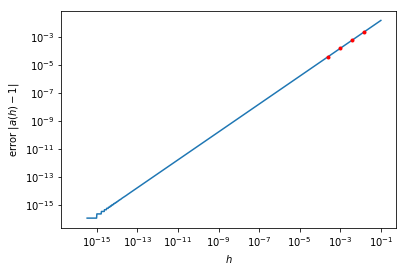

In [4]:
a_extrapolated = interpolate(np.zeros(1), h**2, a)
print(a_extrapolated - 1)
xi = np.logspace(-16, -1, 1001)
plt.loglog(xi, abs(interpolate(xi, h**2, a) - 1))
plt.loglog(h**2, abs(a - 1), 'r.')
plt.xlabel('$h$')
plt.ylabel('error $|a(h)-1|$')
plt.show()

## Beispiel 2: Die Regel von l'Hospital

Wir m??chten gerne

$$a(0) = \lim_{x \to 0^+} \frac{\cos(x) - 1}{\sin(x)}$$

berechnen. Nach l'Hospital wissen wir, dass $a(0) = 0$.

[-0.06258151 -0.03126018 -0.01562627 -0.00781266] [  3.73385453e-09]


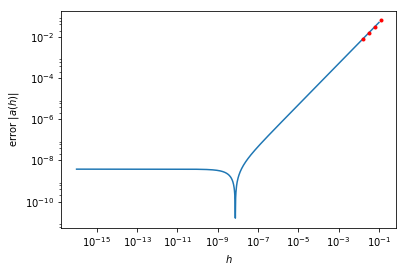

In [5]:
a = (np.cos(h) - 1) / np.sin(h)
a_extrapolated = interpolate(np.zeros(1), h, a)
print(a, a_extrapolated)
plt.loglog(xi, abs(interpolate(xi, h, a)))
plt.loglog(h, abs(a), 'r.')
plt.xlabel('$h$')
plt.ylabel('error $|a(h)|$')
plt.show()